In [1]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("FACT_SALES.csv")
df

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5
...,...,...,...,...,...,...
121997,26-23,7501058792778BP1,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO
121998,26-23,7501058757630,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO
121999,26-23,7501058753441,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO
122000,26-23,7702626204208BP1,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO


In [3]:
df = df.drop(["ITEM_CODE", "REGION", "TOTAL_VALUE_SALES", "TOTAL_UNIT_AVG_WEEKLY_SALES"], axis = 1)
df

,WEEK,TOTAL_UNIT_SALES
0,34-22,0.006
1,34-22,0.487
2,34-22,1.391
3,34-22,0.022
4,34-22,2.037
...,...,...
121997,26-23,1.192
121998,26-23,1.947
121999,26-23,18.013
122000,26-23,21.152


In [4]:
#Cambio de indice principal
df.index = df["WEEK"]
df = df.drop("WEEK", axis = 1)
df

,TOTAL_UNIT_SALES
WEEK,
34-22,0.006
34-22,0.487
34-22,1.391
34-22,0.022
34-22,2.037
...,...
26-23,1.192
26-23,1.947
26-23,18.013


<Axes: xlabel='WEEK'>

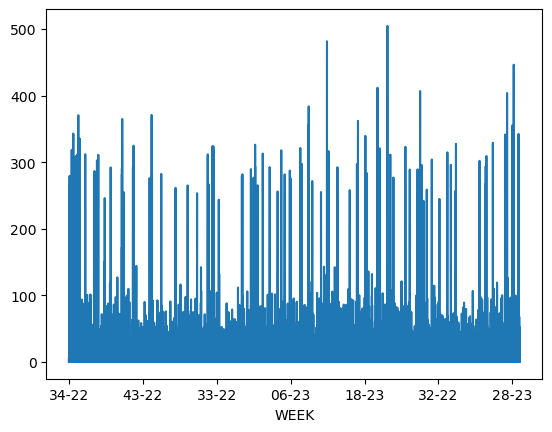

In [5]:
df["TOTAL_UNIT_SALES"].plot()

In [6]:
# Realizacion de la prueba Dickey-Fuller
# H0: la serie es NO ESTACIONARIA
# Ha: la serie SI ES ESTACIONARIA

from statsmodels.tsa.stattools import adfuller
result = adfuller(df["TOTAL_UNIT_SALES"])
print("el valor p de la prueba de Dickey-fuller es:", result[1])

el valor p de la prueba de Dickey-fuller es: 0.0


In [7]:
print(result)

(-49.62294743794428, 0.0, 39, 121962, {'1%': -3.430403618648746, '5%': -2.861563698649731, '10%': -2.566782613953787}, 982700.5724853539)


In [68]:
#Aplicar primeras diferencias
df["FUTURE_SALES"] = df["TOTAL_UNIT_SALES"].diff()
df

KeyError: 'TOTAL_UNIT_SALES'

In [60]:
# Aplicacion de la prueba Dickey-Fuller sobre las diferencias
result2 = adfuller(df["FUTURE_SALES"])
print("el valor p de la prueba Dickey-fuller es: ", result2[1])

KeyError: 'FUTURE_SALES'

<Axes: xlabel='WEEK'>

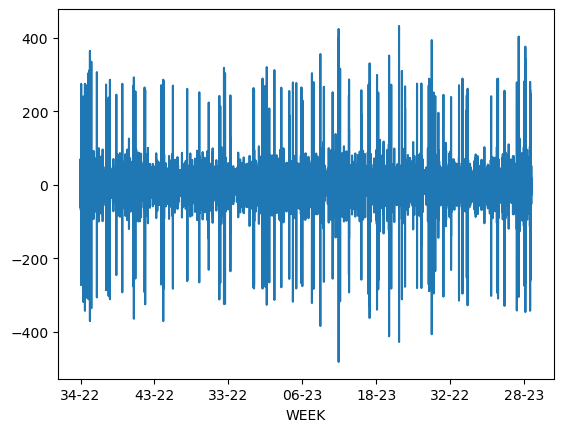

In [21]:
df["FUTURE_SALES"].plot()

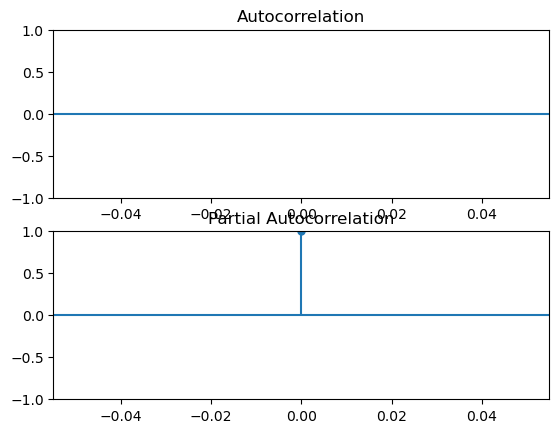

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2,1)
# Graficacion de la funcion de autocorrelacion ACF
plot_acf(df["FUTURE_SALES"], lags = 20, ax = axes[0], alpha = 0.05)

# Graficacion de la funcion de autocrrelacion parcial PACF
plot_pacf(df["FUTURE_SALES"], lags = 20, ax = axes[1], alpha = 0.05)

plt.show()

In [24]:
# Importacion del modulo para estimar un modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA 

#Ajustar los datos a un modelo AR(1) e imprimir su AIC:
mod_ar1 = ARIMA(df["FUTURE_SALES"], order = (1,0,0))
res_ar1 = mod_ar1.fit()
print("El AIC para AR1 es: ", res_ar1.aic)

El AIC para AR1 es:  1016032.9699759951


In [25]:
#Ajustar los datos a un modelo AR(2) e imprimir su AIC:
mod_ar2 = ARIMA(df["FUTURE_SALES"], order = (2,0,0))
res_ar2 = mod_ar2.fit()
print("El AIC para AR2 es: ", res_ar2.aic)

El AIC para AR2 es:  1005115.940511519


In [26]:
#Ajustar los datos a un modelo ARMA(1,1) e imprimir su AIC:
mod_arma11 = ARIMA(df["FUTURE_SALES"], order = (1,0,1))
res_arma11 = mod_arma11.fit()
print("El AIC para ARMA(1,1) es: ", res_arma11.aic)

El AIC para ARMA(1,1) es:  991011.8272729233


In [62]:
# Pronostico de temperaturas usando un modelo ARIMA(1,1,1)
mod = ARIMA(df["FUTURE_SALES"], order = (4,1,1))
res = mod.fit()
print(res.summary())

KeyError: 'FUTURE_SALES'

In [44]:
# pronostico puntual de los proximos 5 semanas
predicciones = res.forecast(5)
predicciones

122002    8.426671
122003   -0.405240
122004    2.307073
122005   -1.159732
122006   -1.616101
Name: predicted_mean, dtype: float64

In [46]:
# pronostico por intervalo de los proximos 5 semanas
conf = res.get_forecast(5).conf_int(alpha = 0.05)
conf

,lower FUTURE_SALES,upper FUTURE_SALES
122002,-19.624241,36.477584
122003,-36.451094,35.640614
122004,-33.912407,38.526554
122005,-37.390077,35.070613
122006,-37.897082,34.664880
